## Exploring Unsupervised Learning
### K-Means Clustering
#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Importing Libraries

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Reading the dataset

In [19]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking unique values of the Species

In [20]:
print(df["Species"].unique)

<bound method Series.unique of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>


### Checking for any null values

In [21]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Preparing the data

In [22]:
x=df.iloc[:,[1,2,3,4]].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Finding optimal value of k(number of clusters)

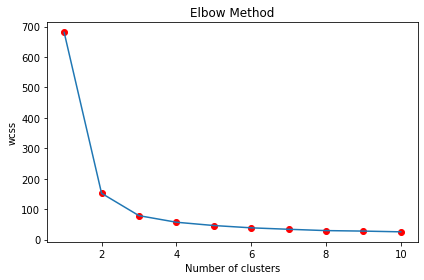

In [23]:
from sklearn.cluster import KMeans

def find_optimal_k():
    wcss=[]
    for index in range(1,11):
        kmeans=KMeans(n_clusters=index)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,11),wcss)
    plt.scatter(range(1,11),wcss,color="red")
    plt.title("Elbow Method")
    plt.xlabel("Number of clusters")
    plt.ylabel("wcss")
    plt.tight_layout()
find_optimal_k()

 From this elbow method, we can clearly see that the elbow occurs at 3. Therefore, optimum number of clusters is 3

### Applying K-Means Algorithm and visualizing clusters

Clusters: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]

Cluster-centers: [[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


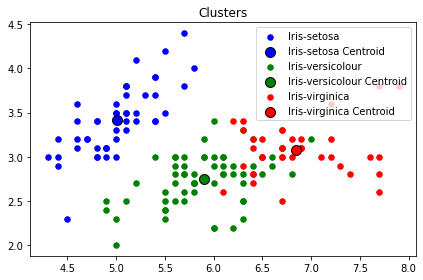

In [24]:
def find_clusters(k):
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit_predict(x)
    print(f"Clusters: {clusters}")
    print()
    print(f"Cluster-centers: {kmeans.cluster_centers_}")
    colors = ['blue','green', 'red']
    labels=['Iris-setosa','Iris-versicolour','Iris-virginica']
    # Visualising the clusters - On the first two columns
    for index in range(k):
        plt.scatter(x[clusters==index,0],x[clusters==index,1],color=colors[index],label=labels[index],s=30)
        # Plotting the centroids of the clusters
        plt.scatter(kmeans.cluster_centers_[index, 0], kmeans.cluster_centers_[index, 1], color=colors[index],label=f'{labels[index]} Centroid',edgecolor="k",s=100)
        
    plt.title("Clusters")
    plt.tight_layout() 
    plt.legend()
    
find_clusters(3)